In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

    # Input data files are available in the read-only "../input/" directory
    # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [2]:
!pip install py7zr
import py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 23.8 MB/s eta 0:00:00
  Attempting uninstall: brotli
    Found existing installation: Brotli 1.0.9
    Uninstalling Brotli-1.0.9:
      Successfully uninstalled Brotli-1.0.9


In [3]:
#Extracting training dataset 

archive= py7zr.SevenZipFile('/kaggle/input/cifar-10/train.7z', mode='r')
archive.extractall('/kaggle/working/')  #if you want to extract to some folder in directoy then give the link to that folder as parameter is extractall()
archive.close()

In [4]:
#importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [5]:
files=os.listdir('/kaggle/working/train')

In [6]:
print(len(files))

50000


In [7]:
files[:5]

['8172.png', '31384.png', '31905.png', '44404.png', '45397.png']

In [8]:
# we dont know how many types of file extensions are there there can be jpg or other types of files too
#code to  check types of extensions

from collections import defaultdict
extensions = defaultdict(int)
for root, dirs, files in os.walk('/kaggle/working/train'):
        for file in files:
            # Split the file name to get the extension
            ext = os.path.splitext(file)[1].lower()  # Convert to lower case to avoid case sensitivity issues
            extensions[ext] += 1
print("File extensions in the dataset:")
for ext, count in extensions.items():
    print(f"{ext}: {count} files")

File extensions in the dataset:
.png: 50000 files


Now that we have idea about our X train data, lets load and learn about Y-data/ lables 

In [9]:
ylabels= pd.read_csv('/kaggle/input/cifar-10/trainLabels.csv')

In [10]:
ylabels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [11]:
print(ylabels['label'].unique())

['frog' 'truck' 'deer' 'automobile' 'bird' 'horse' 'ship' 'cat' 'dog'
 'airplane']


from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizersWe will encode all the different classes of data and assign them values from 1 to 10`

In [12]:
label_dic={'frog':0,'truck':1, 'airplane':2, 'deer':3, 'automobile':4, 'bird':5, 'horse':6, 'ship':7, 'cat':8, 'dog':9}

In [13]:
labels=[label_dic[i] for i in ylabels['label']]

In [14]:
id_list=[i for i in ylabels['id']]

In [15]:
print(ylabels['label'][:5])
print(labels[:5])

0          frog
1         truck
2         truck
3          deer
4    automobile
Name: label, dtype: object
[0, 1, 1, 3, 4]


In [16]:
# ordering the train data

file_dir='/kaggle/working/train/'
data=[]

for id in id_list:
    image = Image.open(file_dir + str(id) + '.png')
    image = np.array(image)
    data.append(image)

In [17]:
X=np.array(data)
Y=np.array(labels)

In [18]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [19]:
print(X[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [21]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (40000,) (10000,)


In [22]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [23]:
import tensorflow as tf
from tensorflow import keras

2024-05-23 07:04:16.303347: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 07:04:16.303445: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 07:04:16.471522: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [24]:
#setting up the layers for the model

num_of_classes=10

model=keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax') #softmax is generally used when we have
    #multiclass classification output, sigmoid is used when  there is binary output


])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',#we are using sparse because our output labels are encoded from 1-10,
              # if they were one-hot encoded like 0010,0100,etc then we had to use 'categorical_cross_entropy' as loss function
              metrics=['acc'])

In [26]:
model.fit(X_train_scaled,Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
  91/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.1372 - loss: 2.4181

I0000 00:00:1716447870.628187      83 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716447870.642622      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.2263 - loss: 2.0995 - val_acc: 0.3015 - val_loss: 1.8736
Epoch 2/10
   1/1125 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - acc: 0.2812 - loss: 1.9536

W0000 00:00:1716447873.048621      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3197 - loss: 1.8685 - val_acc: 0.3145 - val_loss: 1.8784
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3322 - loss: 1.8239 - val_acc: 0.3255 - val_loss: 1.8186
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3461 - loss: 1.8111 - val_acc: 0.3460 - val_loss: 1.7932
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3527 - loss: 1.7960 - val_acc: 0.3420 - val_loss: 1.7896
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3603 - loss: 1.7853 - val_acc: 0.3627 - val_loss: 1.7632
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3577 - loss: 1.7785 - val_acc: 0.3573 - val_loss: 1.7735
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3604 - loss: 1.7676 - val_acc: 0.3487 - val_loss: 1.8060
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3653 - loss: 1.7654 - val_acc: 0.3635 - val_loss: 1.7718
Epoch 10/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/s

In [27]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  

In [28]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [29]:
conv_base=ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
conv_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [30]:
model = models.Sequential()
model.add(layers.UpSampling2D((2, 2), input_shape=(32, 32, 3)))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.UpSampling2D((2, 2)))
model.add(conv_base)
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_of_classes, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/up_sampling2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
# conv_base.trainable=False

In [32]:
# Compile the model with sparse categorical crossentropy
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])


In [33]:
# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [34]:
history = model.fit(X_train_scaled, Y_train, epochs=10, validation_split=0.1,callbacks=[early_stopping])

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 485s 354ms/step - acc: 0.5828 - loss: 1.3745 - val_acc: 0.8565 - val_loss: 0.4438
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 394s 351ms/step - acc: 0.8861 - loss: 0.3862 - val_acc: 0.9090 - val_loss: 0.2876
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 350ms/step - acc: 0.9237 - loss: 0.2614 - val_acc: 0.9013 - val_loss: 0.3461
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 394s 350ms/step - acc: 0.9376 - loss: 0.2106 - val_acc: 0.8992 - val_loss: 0.3249
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 394s 350ms/step - acc: 0.9489 - loss: 0.1769 - val_acc: 0.9118 - val_loss: 0.3037
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 393s 350ms/step - acc: 0.9584 - loss: 0.1406 - val_acc: 0.9005 - val_loss: 0.3510
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 394s 350ms/step - acc: 0.9642 - loss: 0.1207 - val_acc: 0.9020 - val_loss: 0.3607


In [35]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(f'Test Accuracy = {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 124ms/step - acc: 0.9076 - loss: 0.2872
Test Accuracy = 0.9103999733924866


W0000 00:00:1716450836.974357      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


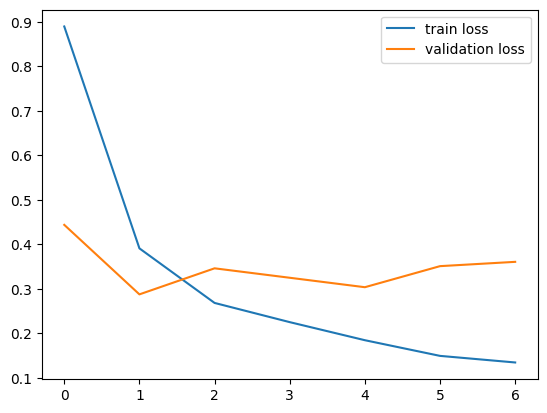

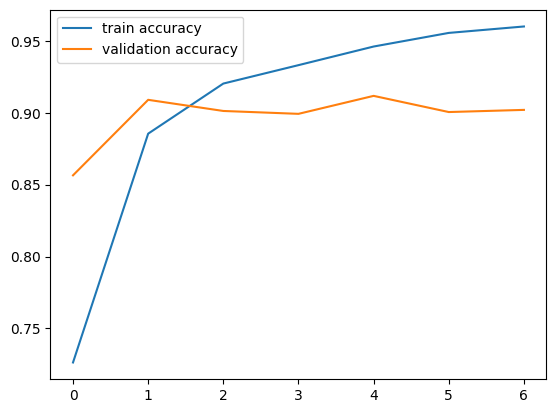

In [36]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()